# Fraud Detection

## Introduction
Credit card fraud can be defined as a form of identity theft where someone fraudulently obtains someone else's credit card information to charge purchases or withdraw funds from the account. While cardholders can avoid the financial liability for fraudulent transactions, it can be costly for businesses. Lost of revenue, written-off cost of the product, and chargeback fee can be the outcomes for merchants who lost a dispute or chose not to fight.
## Purpose
The purpose of this project is to compare the performances of three machine learning algorithms for credit card fraud detection.
## Data Understanding
- The dataset is from <a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud">Kaggle</a>. 
- There are 31 features. 
- A feature called 'Time' contains the number of seconds elapsed between the first transaction and the transaction in the dataset. In this project, feature 'Time' is not used. Features V1, V2, ... V28 are the main components obtained with PCA and the only features that are not transformed with PCA are 'Time' and 'Amount'. The transaction amount is contained in feature 'Amount'. This feature can be used, for example, for cost-aware learning. The feature "Class" is the response variable and takes the value 1 if it is fraud and 0 otherwise.

## Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, plot_precision_recall_curve, precision_recall_curve
import xgboost as xgb
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('D:\FILZA 1\dibimbing\dataset\Credit card fraud dataset\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Remove duplicates.

In [4]:
df = df.drop_duplicates()

## Data Exploration

Find the summary statistics of the data.

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Show the distribution of transaction amount in each class.

[Text(0, 0.5, '')]

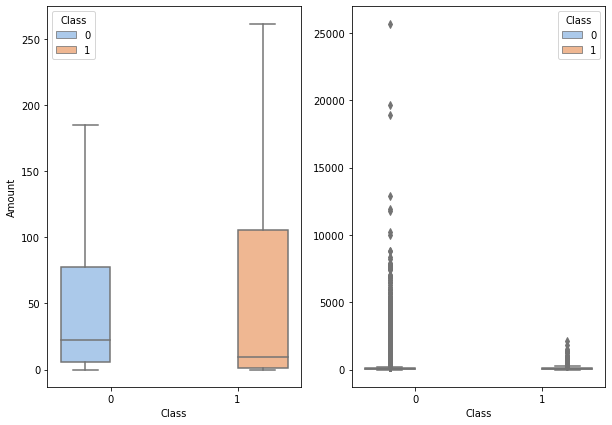

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10,7))
sns.boxplot(x=df['Class'],y=df['Amount'], hue=df['Class'], palette='pastel', showfliers=False, ax=ax[0])
sns.boxplot(x=df['Class'],y=df['Amount'], hue=df['Class'], palette='pastel', ax=ax[1])
ax[1].set(ylabel=None)

Nonfraudulent transactions had a higher median transaction amount than fraudulent transactions. The transaction amounts from fraudulent transactions are more spread out than the nonfraudulent transactions.

Count the cases of fraud and non-fraud and visualize the 'Class' column.

0    0.998333
1    0.001667
Name: Class, dtype: float64


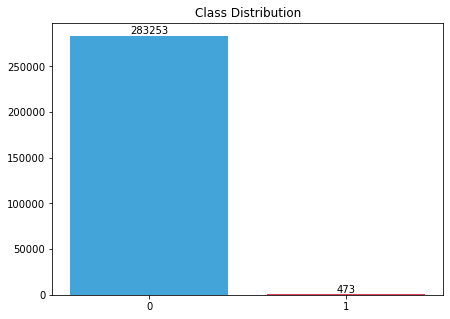

In [7]:
#Count the fraud and non-fraud transactions
count=df['Class'].value_counts()

#Find the ratio of fraud transactions
ratio=count/len(df)
print(ratio)

#Adjust the figure size
fig, ax = plt.subplots(figsize=(7,5))
#Plot the data
ax.bar(x=count.index, height=count, color=['#42A4D8', '#E13D58'])
#Add ticks and values
plt.xticks((0,1))
ax.set_title('Class Distribution')
for i in ax.containers:
    ax.bar_label(i, fontsize=10)

More than 99% of the transactions are nonfraudulent.

Create a scatter plot to visualize the fraud and non-fraud transactions

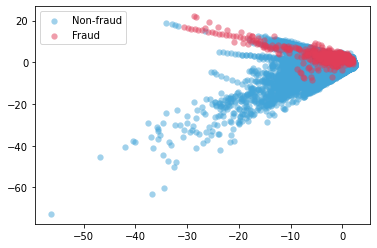

In [8]:
#Assign the 'Class' column to y and 'V1' until 'Amount' to X
X = df.drop(['Time','Class'], axis=1)
X=np.array(X)
y=df['Class']
y=np.array(y)
#Define plot_data
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Non-fraud", alpha=0.5, linewidth=0.15, c=['#42A4D8'])
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Fraud", alpha=0.5, linewidth=0.15, c=['#E13D58'])
    plt.legend()
    return plt.show()
#Use the plot_data on X, y before SMOTE is applied
plot_data(X, y)

Original set before SMOTE is applied.

## SMOTE

There are a lot of non-fraud cases and very few cases of fraud. <b>SMOTE</b>, an over sampling technique, will adjust the imbalance of the data.

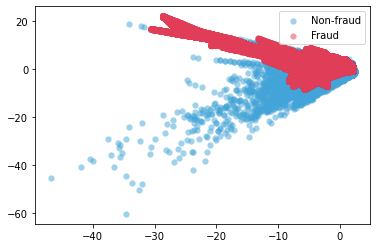

In [9]:
oversampling = SMOTE()
#Split the data into a train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)
X_resampled, y_resampled = oversampling.fit_resample(X_train, y_train)
#Visualize the resampled data of feature v1
plot_data(X_resampled, y_resampled)

After SMOTE is applied.

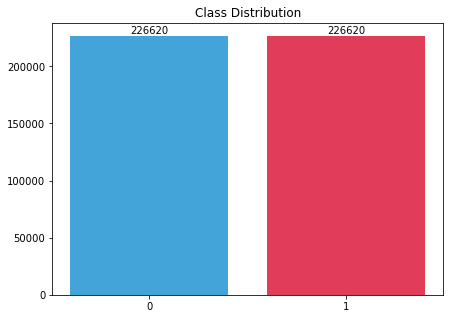

In [10]:
re_df = pd.DataFrame(y_resampled)
re_count = re_df[0].value_counts()
#Adjust figure size
fig, ax = plt.subplots(figsize=(7,5))
ax.bar(x=re_count.index, height=re_count, color=['#42A4D8', '#E13D58'])
#Add ticks and values
plt.xticks((0,1))
ax.set_title('Class Distribution')
for i in ax.containers:
    ax.bar_label(i, fontsize=10)

## Training and Predicting

### Find the optimal hyperparameters
Tune hyperparameters and cross validate the models to prevent overfitting using <b>GridSearchCV</b>.

In [11]:
cv = 3
def gridsearch(clf, params):
    grid = GridSearchCV(estimator=clf, param_grid=params, cv=cv, n_jobs=-1)
    return grid

### <b>XGBoost Classifier</b>

In [12]:
#Define the model
xg = xgb.XGBClassifier(random_state=100)
#Define the hyperparameters
xgb_learning_rate = [0.1, 0.5, 0.9]
xgb_subsample = [0.3, 0.9]
xgb_max_depth = [2, 5]
#Define the hyperparameters sets
xgb_grid = {'learning_rate':xgb_learning_rate, 'subsample':xgb_subsample, 'max_depth':xgb_max_depth}
xgb_clf = gridsearch(xg, xgb_grid)
#Fit the model to training data
xgb_clf.fit(X_resampled, y_resampled)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=100, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.9], 'max_depth': [2, 5],
                         'subsample': [0.3, 0.9]})

In [13]:
#Get predictions
xgb_pred = xgb_clf.predict(X_test)

### <b>Random Forest</b>

In [14]:
#Define the model
rf = RandomForestClassifier(random_state=100)
#Hyperparameters for RandomForestClassifier
rf_n_estimators = [1, 30]
rf_max_features = ['sqrt', 'log2']
rf_max_depth = [3, 4, 5, 8]
rf_criterion = ['gini', 'entropy']
#Define the hyperparameters sets
rf_grid = {'n_estimators':rf_n_estimators, 'max_features':rf_max_features, 'max_depth':rf_max_depth, 'criterion':rf_criterion}
rf_clf = gridsearch(rf, rf_grid)
#Fit the model to training data
rf_clf.fit(X_resampled, y_resampled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [1, 30]})

In [15]:
#Get predictions
rf_pred = rf_clf.predict(X_test)

### <b>StackingClassifier</b>

The training or resampled data is split into training data and validation data using cross validation with cv=3. Without tuning the hyperparameters, each set is used to train the estimators in the first-layer.
In this stacked ensemble model, two classifiers are used as the first-layer estimators. 

Estimators in the first-layer:

<b>   1. XGBoost Classifier

<b>   2. Random Forest Classifier

The final estimator is <b>XGBoost Classifier</b>.


In [16]:
#Define the first estimators
estimators = [('rf', RandomForestClassifier(random_state=100)), ('xgb',xgb.XGBClassifier(random_state=100))]
#Define the final estimators
final = xgb.XGBClassifier(random_state=100)
clf = StackingClassifier(estimators=estimators, final_estimator=final, cv=cv)
clf.fit(X_resampled, y_resampled)

StackingClassifier(cv=3,
                   estimators=[('rf', RandomForestClassifier(random_state=100)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              inte...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=100,
                                                 reg_alpha=None,
                                                 reg_lambda=None, ...))

In [17]:
#Get predictions
clf_pred = clf.predict(X_test)

### <b>Peformance Evaluation</b>

<b>Confusion Matrices</b>

Confusion matrix can be used to explain performance of classification system based on data test where the positive value is known. True posisitve represents cases where the predicted data and the actual data are positive. True negative represents cases where the predicted data and the actual data are negative. False positive
represents cases where the predicted data is positive while the actual data is negative. False negative represents cases where the predicted data is negative and the actual data is positive.

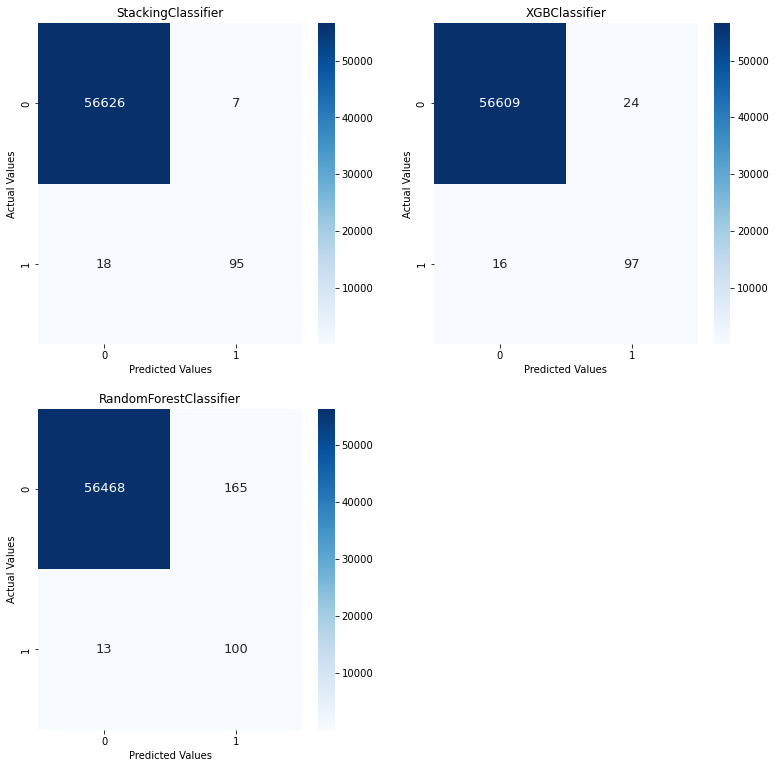

In [18]:
#XGBoost Classifier
xgb_matrix = confusion_matrix(y_test, xgb_pred, labels=xgb_clf.classes_)
#Random Forest Classifier
rf_matrix = confusion_matrix(y_test, rf_pred, labels=rf_clf.classes_)
#StackingClassifier
clf_matrix = confusion_matrix(y_test, clf_pred, labels=clf.classes_)

fig, ax = plt.subplots(2, 2, figsize=(13,13))
#Visualize the confusion matrices with heatmap
sns.heatmap(clf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax[0,0], annot_kws={'size':13})
sns.heatmap(xgb_matrix, annot=True, cmap='Blues', fmt='g', ax=ax[0,1], annot_kws={'size':13})
sns.heatmap(rf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax[1,0], annot_kws={'size':13})

#Add titles and axes labels
ax[0,0].set_title('StackingClassifier')
ax[0,1].set_title('XGBClassifier')
ax[1,0].set_title('RandomForestClassifier')
ax[1,1].set_axis_off()
for x in ax.flat:
    x.set(xlabel='Predicted Values', ylabel='Actual Values')

We can see from the three confusion matrices that RandomForestClassifier is better at predicting fraud class than the other models. While, StackingClassifier is better at predicting non-fraud class than the rest of the models.

<b>Comparison of the Precision, Recall, and F1-Score</b>

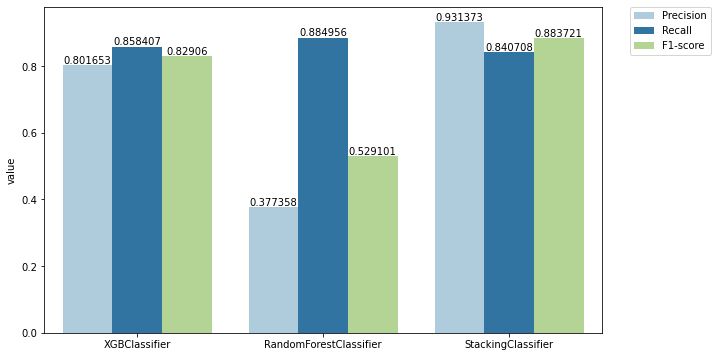

In [19]:
#Precision
xgb_prc = precision_score(y_test, xgb_pred)
rf_prc = precision_score(y_test, rf_pred)
clf_prc = precision_score(y_test, clf_pred)
#Recall
xgb_re = recall_score(y_test, xgb_pred)
rf_re = recall_score(y_test, rf_pred)
clf_re = recall_score(y_test, clf_pred)
#F1-score
xgb_f1 = f1_score(y_test, xgb_pred)
rf_f1 = f1_score(y_test, rf_pred)
clf_f1 = f1_score(y_test, clf_pred)

plt.gcf().set_size_inches(10,6)
comp=pd.DataFrame({'XGBClassifier':{'Precision':xgb_prc, 'Recall':xgb_re, 'F1-score':xgb_f1}, 
                   'RandomForestClassifier':{'Precision':rf_prc, 'Recall':rf_re, 'F1-score':rf_f1}, 
                  'StackingClassifier':{'Precision':clf_prc, 'Recall':clf_re, 'F1-score':clf_f1}})
#Create a bar plot
ax = sns.barplot(x='', y='value', hue='index', data=comp.reset_index().melt(id_vars='index', var_name=''), palette='Paired')
#Move the legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
#Show the labels
for i in ax.containers:
    ax.bar_label(i,)

Precision and F1-score from StackingClassifier are higher than tuned XGBClassifier and RandomForestClassifier. Recall from RandomForestClassifier is higher than StackingClassifier and XGBClassifier. 

## Conclusion

XGBClassifier, RandomForestClassifier, and StackingClassifier are trained on balanced data obtained by applying SMOTE. GridSearchCV is used to validate and tune the XGBClassifier and RandomForestClassifier hyperparameters. The hyperparameters of the first and final estimators in StackingClassifier are not tuned. Each models produced different predictions. Tuned RandomForestClassifier produced smaller number of false positives than StackingClassifier. However, StackingClassifier produced the smallest number of false negatives.

## Reference
1. Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

2. Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

3. Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

4. Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

5. Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

6. Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

7. Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

8. Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

9. Yann-Aël Le Borgne, Gianluca Bontempi Reproducible machine Learning for Credit Card Fraud Detection - Practical Handbook

10. Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi Incremental learning strategies for credit cards fraud detection, IInternational Journal of Data Science and Analytics

11. Credit Card Fraud: What Small Businesses Can Do. https://www.nerdwallet.com/article/small-business/credit-card-fraud#:~:text=Credit%20card%20fraud%20can%20impact,it%20has%20to%20deal%20with

12. Credit Card Fraud. https://www.findlaw.com/criminal/criminal-charges/credit-debit-card-fraud.html